In [1]:
import numpy as np
import pandas as pd
% matplotlib inline


In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler() 

In [12]:
names = ['a', 'b', 'c', 'd', 'class']
train = pd.read_csv('iris_data.csv', names=names)

In [13]:
train.head()

,a,b,c,d,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
train.shape

(150, 5)

In [15]:
scaler.fit(train.drop('class', axis = 1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
scaled_features = scaler.transform(train.drop('class', axis = 1))

In [17]:
scaled_features

array([[ -9.00681170e-01,   1.03205722e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,  -1.24957601e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.38535265e+00,   3.37848329e-01,  -1.39813811e+00,
         -1.31297673e+00],
       [ -1.50652052e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.02184904e+00,   1.26346019e+00,  -1.34127240e+00,
         -1.31297673e+00],
       [ -5.37177559e-01,   1.95766909e+00,  -1.17067529e+00,
         -1.05003079e+00],
       [ -1.50652052e+00,   8.00654259e-01,  -1.34127240e+00,
         -1.18150376e+00],
       [ -1.02184904e+00,   8.00654259e-01,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.74885626e+00,  -3.56360566e-01,  -1.34127240e+00,
         -1.31297673e+00],
       [ -1.14301691e+00,   1.06445364e-01,  -1.28440670e+00,
         -1.44444970e+00],
       [ -5.37177559e-01,   1.49486315e+00,  -1.28440670e+00,
         -1.31297673e+00],
       [ -1.26418478e

In [23]:
df_feat = pd.DataFrame(scaled_features, columns = train.columns[:-1])

In [22]:
train.columns[:-1]

Index(['a', 'b', 'c', 'd'], dtype='object')

In [24]:
df_feat.head()

,a,b,c,d
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [19]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [26]:
knn = KNN(n_neighbors=1)

In [21]:
from sklearn.model_selection import train_test_split

In [25]:
X = df_feat
Y = train['class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [27]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [28]:
pred = knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.95      0.95      0.95        20
 Iris-virginica       0.92      0.92      0.92        12

    avg / total       0.96      0.96      0.96        45



In [31]:
error = []

for i in range(1,40):
    
    knn = KNN(n_neighbors=i)
    knn.fit(X_train,Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test)) #average error rate where pred is not equal to test values
    

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))


Text(0,0.5,'error')

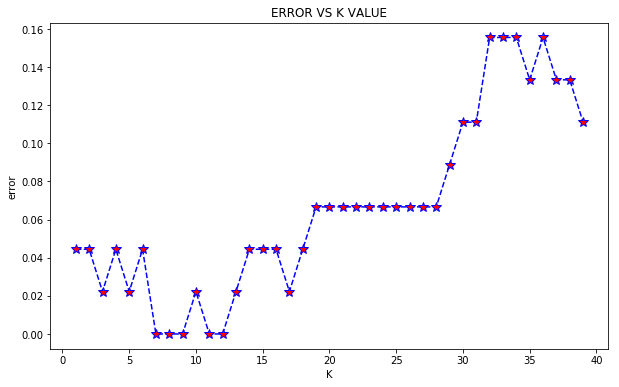

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error, color='blue', linestyle='dashed', marker='*',markerfacecolor='red',markersize=10)

plt.title('ERROR VS K VALUE')
plt.xlabel('K')
plt.ylabel('error')

In [36]:
knn = KNN(n_neighbors=7)

In [37]:
knn.fit(X_train, Y_train)
pred = knn.predict(X_test)

print(confusion_matrix(Y_test,pred))
print(classification_report(Y_test,pred))


[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

    avg / total       1.00      1.00      1.00        45



## Finished 